## Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] =140
plt.rcParams['text.usetex']=True

## Grab Data

In [4]:
noise_list = [0.0,0.05,0.1,0.15]
imbalance_list = [0.5, 0.6, 0.7, 0.8, 0.9]

df = pd.DataFrame(columns=[*np.arange(0.5,10,0.25), 'imbalance', 'noise'])
kl_df = pd.DataFrame(columns=[*np.arange(0.5,10,0.25), 'imbalance', 'noise'])

for (noise,imbalance) in ((n,i) for n in noise_list for i in imbalance_list):
    data = np.load('mse_{imbalance}_{noise}.npy'.format(imbalance=imbalance, noise=noise))
    kl_data = np.load('kl_{imbalance}_{noise}.npy'.format(imbalance=imbalance, noise=noise))
    df.loc[len(df)] = [*data,imbalance,noise]
    kl_df.loc[len(kl_df)] = [*kl_data,imbalance,noise]


<AxesSubplot:title={'center':'KL of Learned Posterior and True Posterior, Averaged over Noise'}, xlabel='Imbalance', ylabel='KL Divergence'>

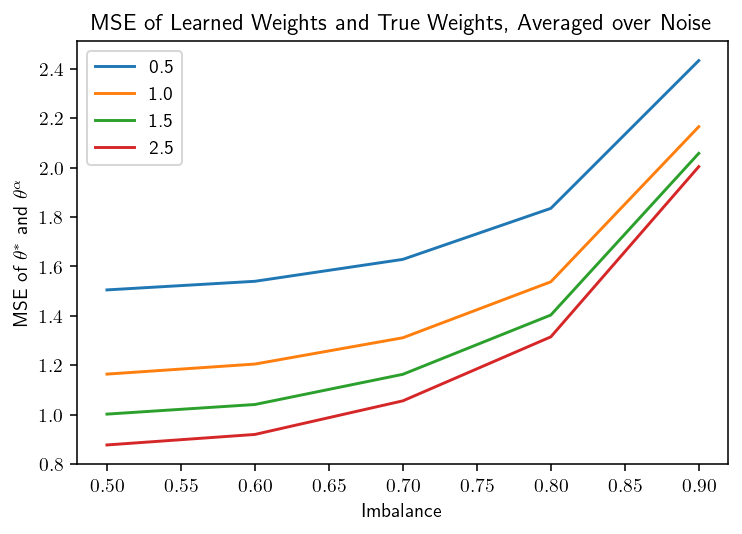

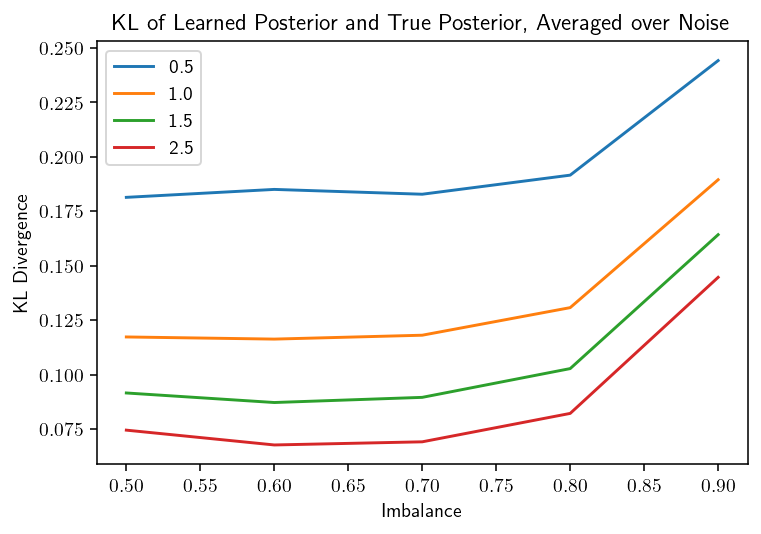

In [5]:
alpha_list = [0.5, 1.0, 1.5,2.5]
df[[*alpha_list,'noise', 'imbalance']].groupby('imbalance').mean()[alpha_list].plot(title='MSE of Learned Weights and True Weights, Averaged over Noise',xlabel='Imbalance', ylabel=r'MSE of $\theta^*$ and $\theta^{\alpha}$')
kl_df[[*alpha_list,'noise', 'imbalance']].groupby('imbalance').mean()[alpha_list].plot(title='KL of Learned Posterior and True Posterior, Averaged over Noise',xlabel='Imbalance', ylabel=r'KL Divergence')

<AxesSubplot:title={'center':'KL of Learned Weights and True Weights, 0 Noise'}, xlabel='Imbalance', ylabel='KL of $\\theta^*$ and $\\theta^{\\alpha}$'>

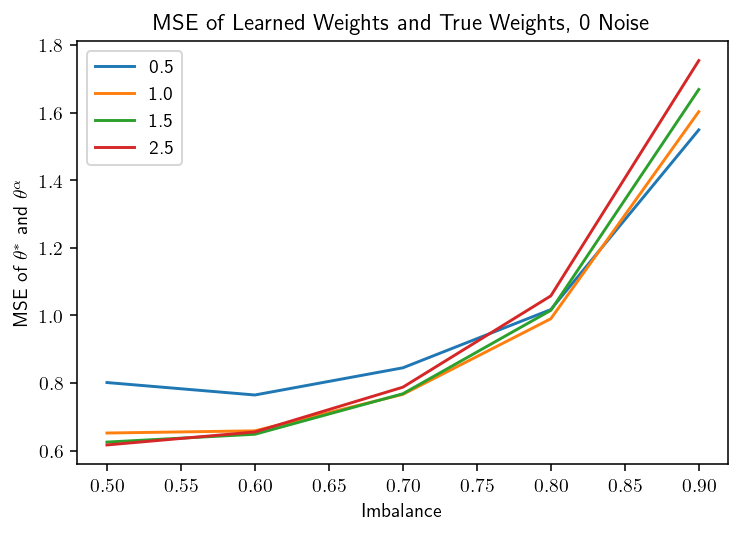

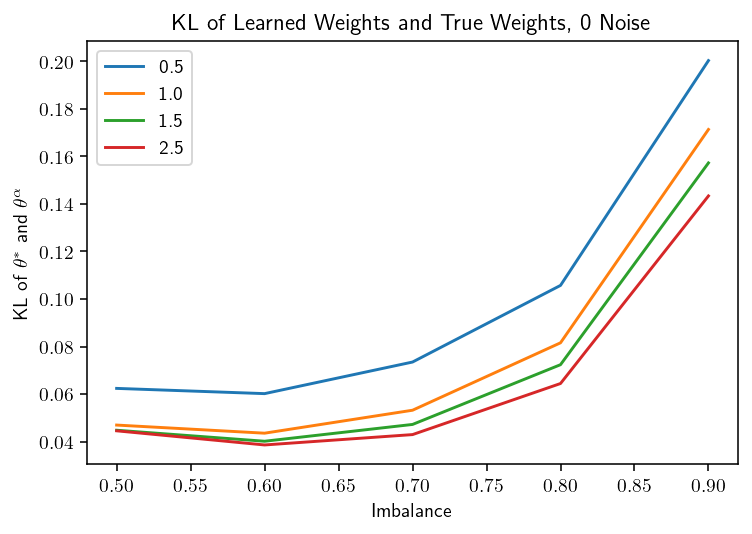

In [6]:
df[df['noise']==0.0][[*alpha_list, 'imbalance']].plot(x='imbalance',title='MSE of Learned Weights and True Weights, 0 Noise',xlabel='Imbalance', ylabel=r'MSE of $\theta^*$ and $\theta^{\alpha}$')
kl_df[kl_df['noise']==0.0][[*alpha_list, 'imbalance']].plot(x='imbalance',title='KL of Learned Weights and True Weights, 0 Noise',xlabel='Imbalance', ylabel=r'KL of $\theta^*$ and $\theta^{\alpha}$')

<AxesSubplot:title={'center':'KL of Learned Weights and True Weights, 15% Noise'}, xlabel='Imbalance', ylabel='KL of $\\theta^*$ and $\\theta^{\\alpha}$'>

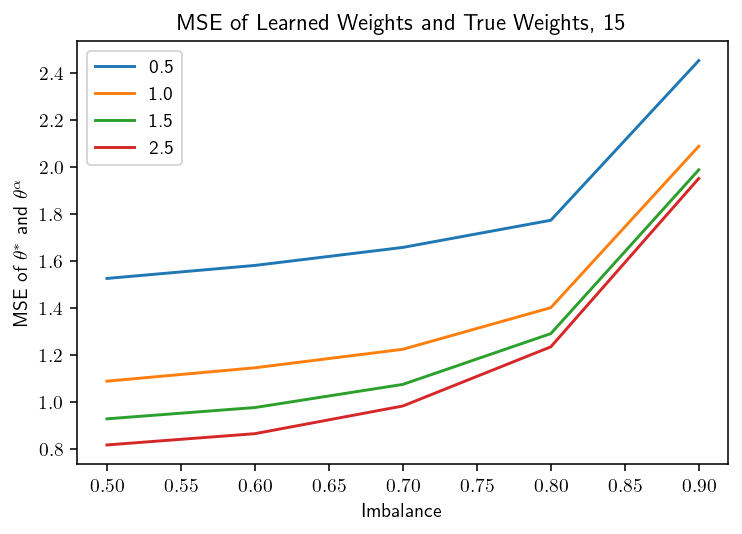

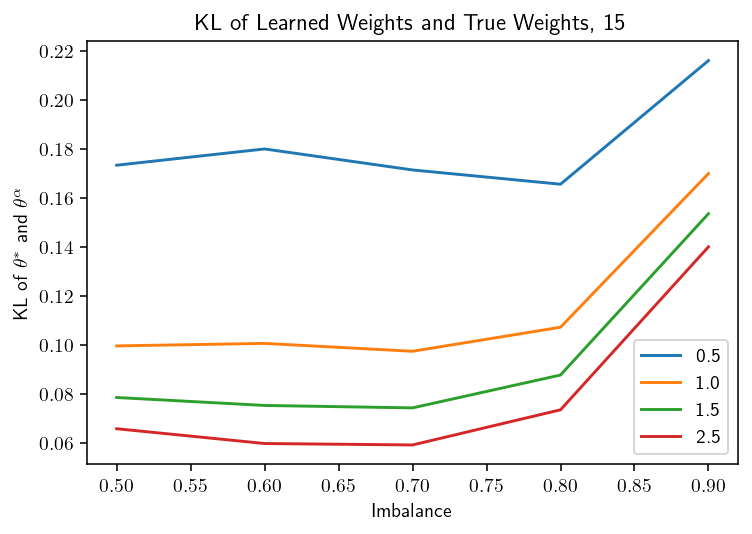

In [7]:
df[df['noise']==0.05][[*alpha_list, 'imbalance']].plot(x='imbalance',title='MSE of Learned Weights and True Weights, 15% Noise',xlabel='Imbalance', ylabel=r'MSE of $\theta^*$ and $\theta^{\alpha}$')
kl_df[kl_df['noise']==0.05][[*alpha_list, 'imbalance']].plot(x='imbalance',title='KL of Learned Weights and True Weights, 15% Noise',xlabel='Imbalance', ylabel=r'KL of $\theta^*$ and $\theta^{\alpha}$')

<AxesSubplot:title={'center':'KL of Learned Weights and True Weights, Averaged over Imbalance'}, xlabel='Noise', ylabel='KL of $\\theta^*$ and $\\theta^{\\alpha}$'>

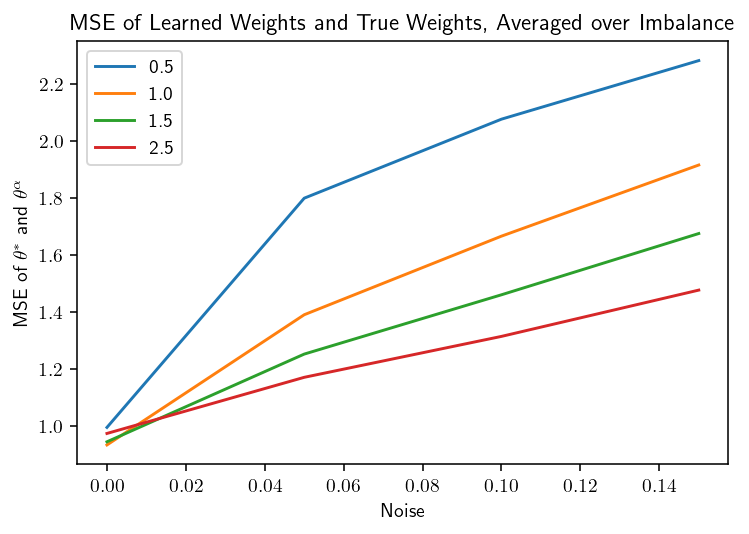

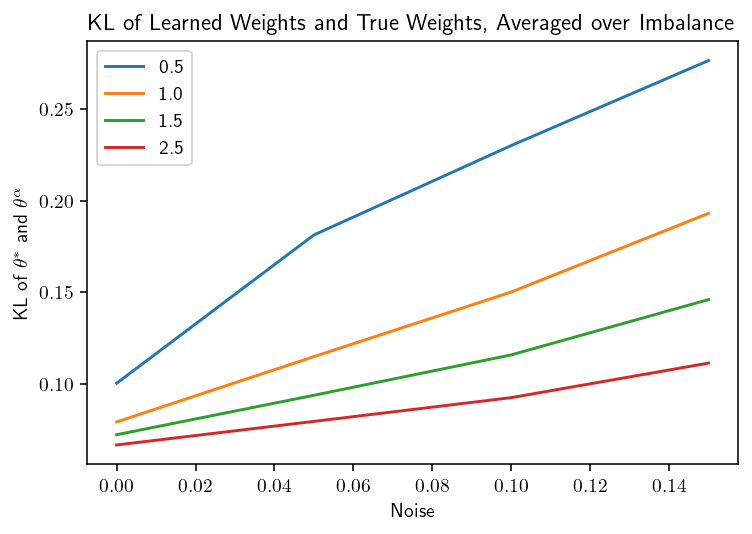

In [8]:
df[[*alpha_list, 'noise', 'imbalance']].groupby('noise').mean()[alpha_list].plot(title='MSE of Learned Weights and True Weights, Averaged over Imbalance',xlabel='Noise', ylabel=r'MSE of $\theta^*$ and $\theta^{\alpha}$')
kl_df[[*alpha_list, 'noise', 'imbalance']].groupby('noise').mean()[alpha_list].plot(title='KL of Learned Weights and True Weights, Averaged over Imbalance',xlabel='Noise', ylabel=r'KL of $\theta^*$ and $\theta^{\alpha}$')

<AxesSubplot:title={'center':'KL of Learned Weights and True Weights, Balanced Classes'}, xlabel='Noise', ylabel='KL of $\\theta^*$ and $\\theta^{\\alpha}$'>

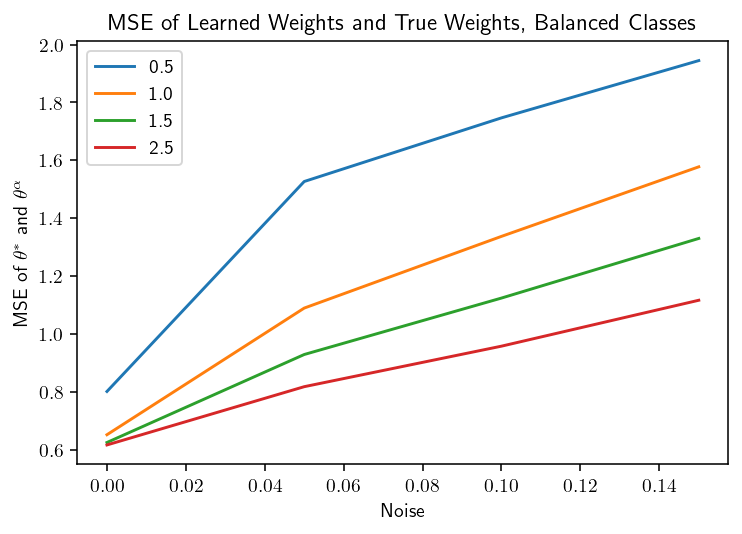

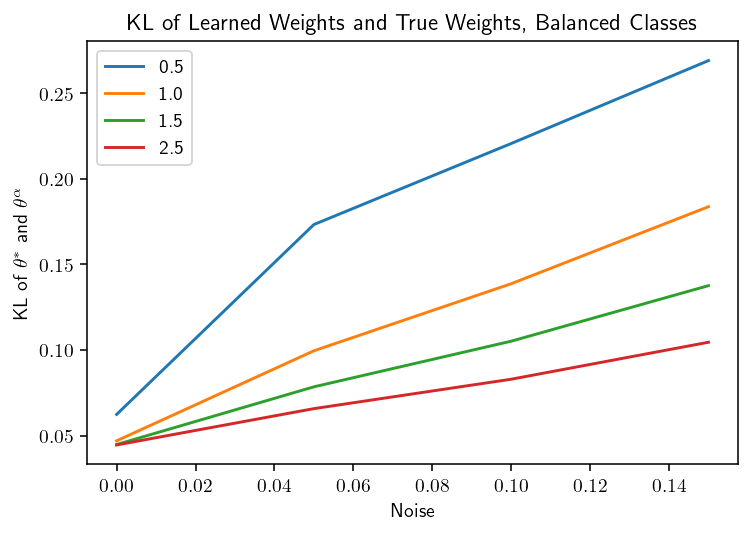

In [9]:
df[df.imbalance==0.5][[*alpha_list, 'noise']].plot(x='noise',title='MSE of Learned Weights and True Weights, Balanced Classes',xlabel='Noise', ylabel=r'MSE of $\theta^*$ and $\theta^{\alpha}$')
kl_df[kl_df.imbalance==0.5][[*alpha_list, 'noise']].plot(x='noise',title='KL of Learned Weights and True Weights, Balanced Classes',xlabel='Noise', ylabel=r'KL of $\theta^*$ and $\theta^{\alpha}$')

<AxesSubplot:title={'center':'KL of Learned Weights and True Weights, 70:30 Imbalance'}, xlabel='Noise', ylabel='KL of $\\theta^*$ and $\\theta^{\\alpha}$'>

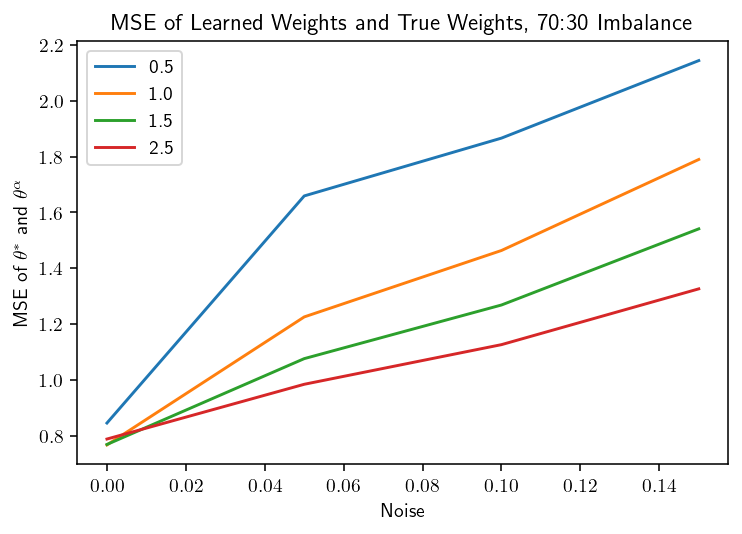

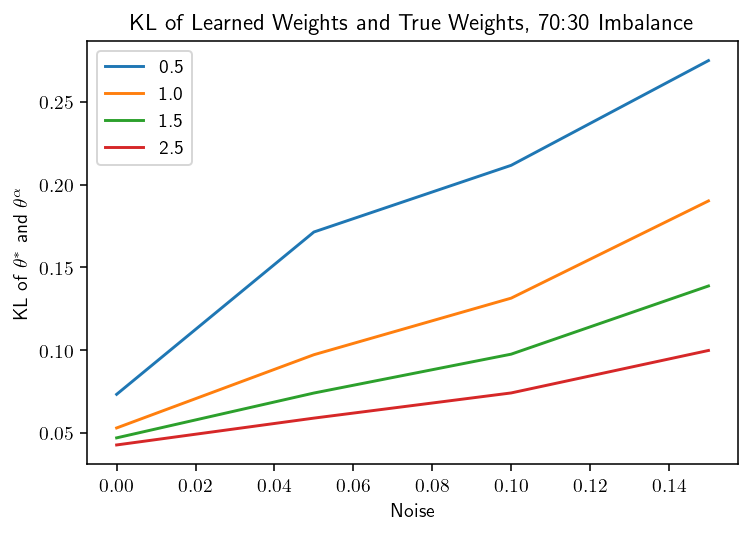

In [10]:
df[df.imbalance==0.7][[*alpha_list, 'noise']].plot(x='noise',title='MSE of Learned Weights and True Weights, 70:30 Imbalance',xlabel='Noise', ylabel=r'MSE of $\theta^*$ and $\theta^{\alpha}$')
kl_df[kl_df.imbalance==0.7][[*alpha_list, 'noise']].plot(x='noise',title='KL of Learned Weights and True Weights, 70:30 Imbalance',xlabel='Noise', ylabel=r'KL of $\theta^*$ and $\theta^{\alpha}$')

0     2.00
5     9.75
10    9.75
15    9.75
dtype: float64

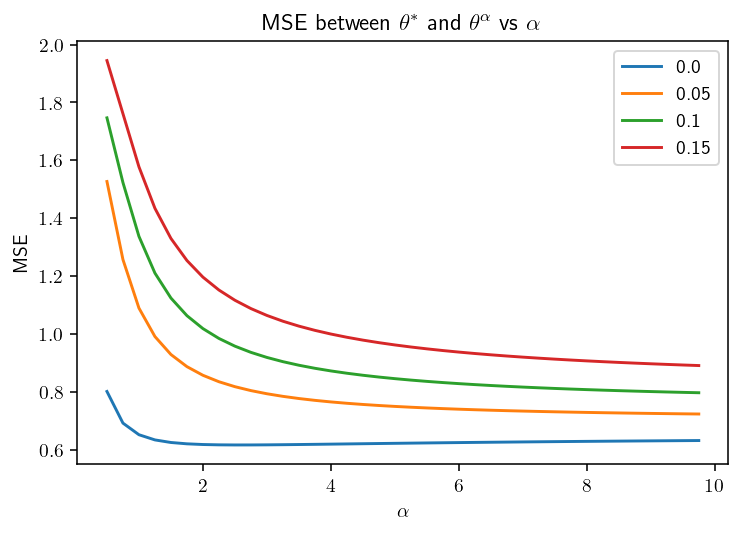

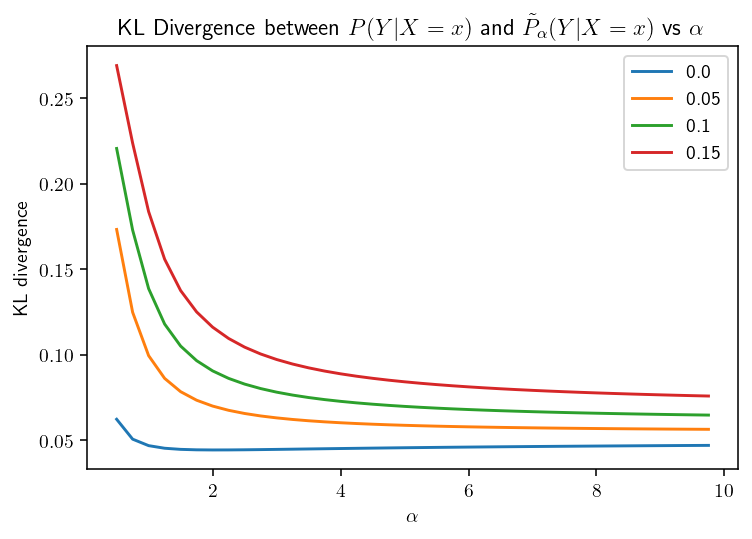

In [19]:
df[df.imbalance==0.5].iloc[:,:-2].T.plot(xlabel=r'$\alpha$', ylabel=r'MSE', title=r'MSE between $\theta^*$ and $\theta^{\alpha}$ vs $\alpha$')
plt.legend(['0.0','0.05','0.1','0.15'])
kl_df[kl_df.imbalance==0.5].iloc[:,:-2].T.plot(xlabel=r'$\alpha$',ylabel=r'KL divergence', title=r'KL Divergence between $P(Y|X=x)$ and $\tilde P_{\alpha}(Y|X=x)$ vs $\alpha$')
plt.legend(['0.0','0.05','0.1','0.15'])
kl_df[kl_df.imbalance==0.5].iloc[:,:-2].T.idxmin()

<AxesSubplot:>

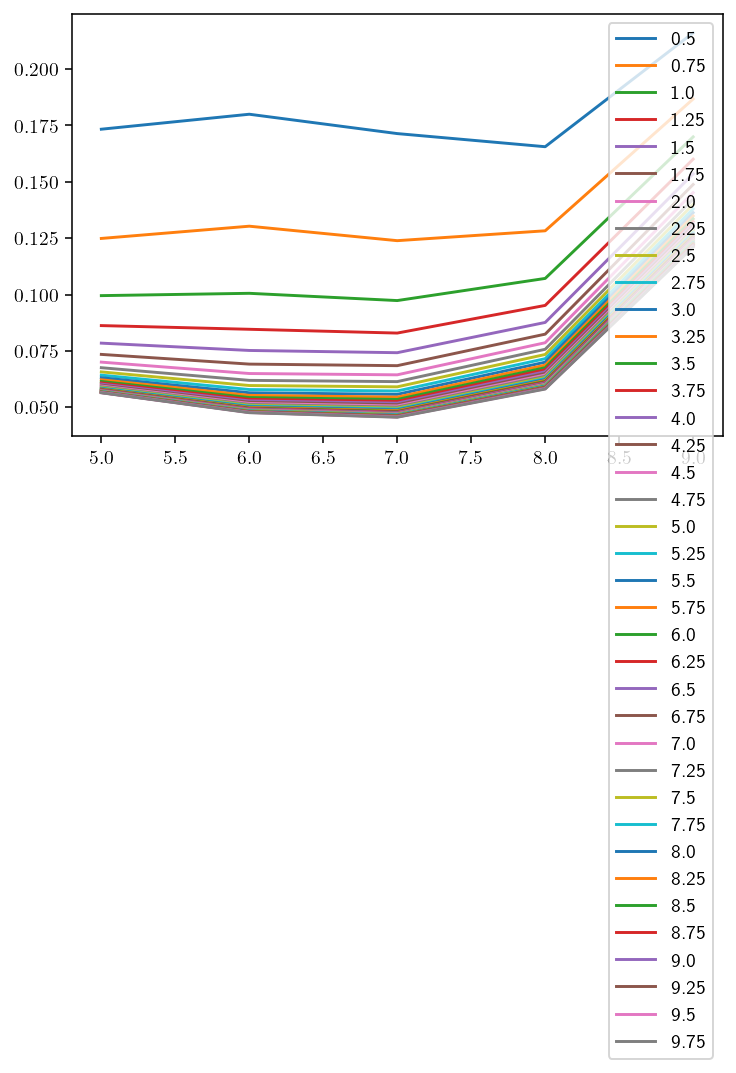

In [12]:
kl_df[kl_df['noise']==0.05].iloc[:,:-2].plot()

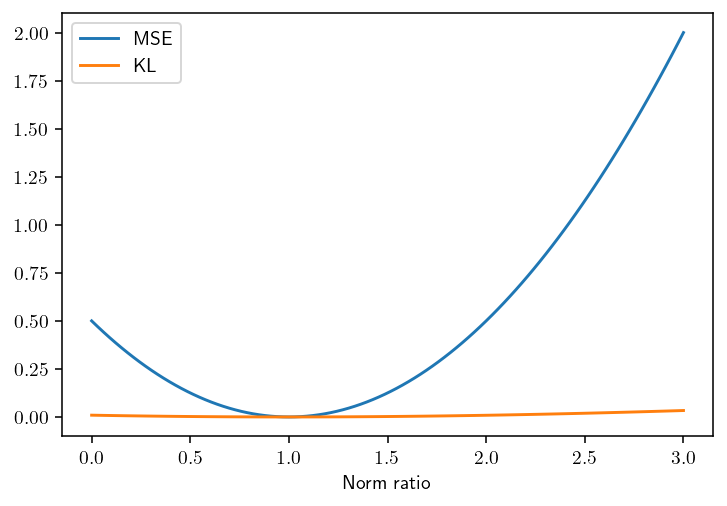

In [13]:
from scipy.stats import entropy
def sigmoid(x):
    return 1/(1+np.exp(-x))
a = np.tile(np.array([np.sqrt(2)/2,-np.sqrt(2)/2]), (100,1))
x=np.linspace(0,3,100)
features = np.random.rand(2,1000)
plt.plot(x, np.square((a-x[:,np.newaxis]*a)).mean(axis=1), label='MSE')
plt.plot(x, entropy(sigmoid(a@features),sigmoid((x[:,np.newaxis]*a)@features), axis=1), label='KL')
plt.xlabel('Norm ratio')
plt.legend()

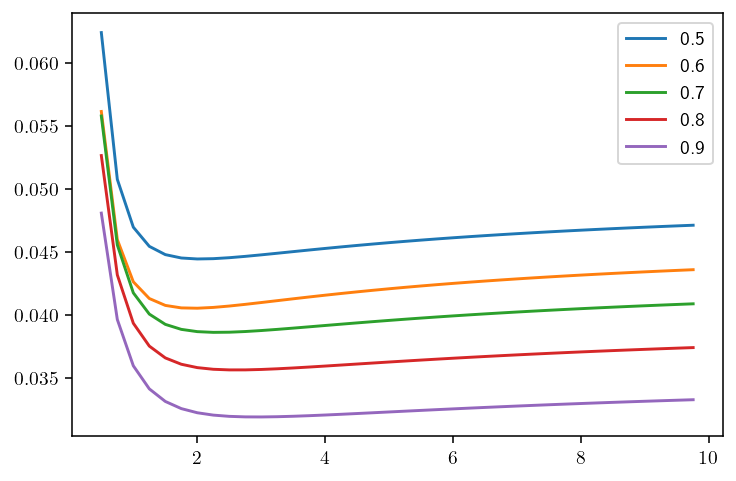

In [29]:
noise_list=[0.0]
fixed_df = pd.DataFrame(columns=[*np.arange(0.5,10,0.25), 'imbalance', 'noise'])
for (noise,imbalance) in ((n,i) for n in noise_list for i in imbalance_list):
    data = np.load('kl_{imbalance}_{noise}_fixed_imbalance.npy'.format(imbalance=imbalance,noise=noise))
    fixed_df.loc[len(fixed_df)] = [*data, imbalance, noise]
fixed_df.iloc[:,:-2].T.plot()
plt.legend(fixed_df.imbalance)
plt.title(r'KL Divergence between $P(Y|X)$ and $P_{\alpha}(Y|X)$, $P(Y|X)$ calculated with fixed imbalance')